In [11]:
import datetime as dt 
import matplotlib.pyplot as plt 
from matplotlib import style
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates
import pandas as pd 
import pandas_datareader.data as web

style.use('ggplot')
start = dt.datetime(2000,1,1)
end = dt.datetime(2016,12,31)

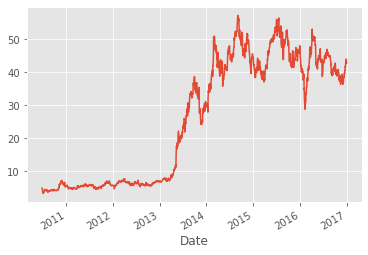

In [2]:
# Load data for specific stock ticker
df = web.DataReader('TSLA', 'yahoo', start, end)

# Plot the stock df
df['Adj Close'].plot()
plt.show()

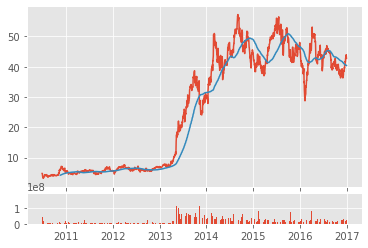

In [9]:
# Calculate 100-day Moving Average
df['100ma'] = df['Adj Close'].rolling(window=100).mean() #can use sum()

# Plot data with 100-day Moving Average
ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1),(5,0),rowspan=1, colspan=1, sharex=ax1)
ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])

plt.show()


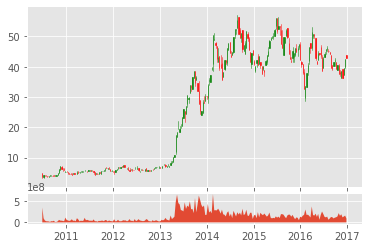

In [15]:
# Resample the data by timeframe
df_ohlc = df['Adj Close'].resample('10D').ohlc() #not rolling! can use mean() or sum()
df_vol = df['Volume'].resample('10D').sum() #not rolling! can use mean()

# Make 'Date' a column and covert it to mdates
df_ohlc.reset_index(inplace=True)
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

# Plot resampled data in candle chart
ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1),(5,0),rowspan=1, colspan=1, sharex=ax1)
ax1.xaxis_date() #Display mdates.date2num as beautiful dates
candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')
ax2.fill_between(df_vol.index.map(mdates.date2num), df_vol.values, 0)
plt.show()

In [30]:
# Scrap all S&P500 tickers from wikipedia
import bs4 as bs
import pickle
import os
import requests

def save_sp500_tickers():
    resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text)
    table = soup.find('table', {'class':'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text[:-2]
        tickers.append(ticker)
    with open('sp500tickers.pickle','wb') as f:
        pickle.dump(tickers, f)
    return tickers

print(save_sp500_tickers()[:10]) #check tickers
print(len(save_sp500_tickers())) #check # of tickers

['MM', 'AB', 'ABB', 'ABM', 'AC', 'ATV', 'ADB', 'AM', 'AA', 'AE']
505


In [33]:
def get_data_yahoo(reloead_sp500=False):
    if reloead_sp500:
        tickers = save_sp500_tickers()
    else:
        with open('sp500tickers.pickle','rb') as f:
            tickers = pickle.load(f)

    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')

    start = dt.datetime(2000,1,1)
    end = dt.datetime(2016,12,31)
    for ticker in tickers:
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            df = web.DataReader(ticker, 'yahoo', start, end)
            df.to_csv('stock_dfs/{}.csv'.format(ticker))
        else:
            print('Already have {}'.format.ticker)

#get_data_yahoo() #'Date' Error??????????

https://www.youtube.com/watch?v=j0zW_KXyQJ4&list=PLQVvvaa0QuDcOdF96TBtRtuQksErCEBYZ&index=7